Project Description:
Four "Corgie" model vehicles were used for the experiment: a double-decker bus, Chevrolet  van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was  chosen with the expectation that the bus, van and either one of the cars would be readily  distinguishable, but it would be more difficult to distinguish between the cars. 

The points distribution for this case is as follows: 

1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5  points) 

2. Understanding the attributes - Find the relationship between different attributes (Independent  variables) and choose carefully which all attributes have to be a part of the analysis and why (5  points) 

3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which  covers more than 95% of the variance) - 10 points 

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel  = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy.  (10 points) 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [2]:
vehicle_data=pd.read_csv("vehicle.csv")
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
vehicle_data.shape

(846, 19)

In [4]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

# All the features are numeric except class which is categorical. We have to convert it to numeric using Label Encoding.¶

In [5]:
vehicle_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [6]:
print ("Before missing value treatment: ")
print (vehicle_data.isna().sum())

Before missing value treatment: 
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


# The missing values in the data are imputed with median¶

In [8]:
vehicle_data = vehicle_data.fillna(vehicle_data.median())

In [9]:
print ("After missing value treatment: ")
print (vehicle_data.isna().sum())

After missing value treatment: 
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


# Grouping the data based on class, we have more data in car class than other two types (bus, van). This may lead to biased output towards car class.¶

In [10]:
vehicle_data.groupby(['class']).size()

class
bus    218
car    429
van    199
dtype: int64

# Visualizing the outliers and skewness with boxplot grouped by class. As the class have influenze in the feature values.

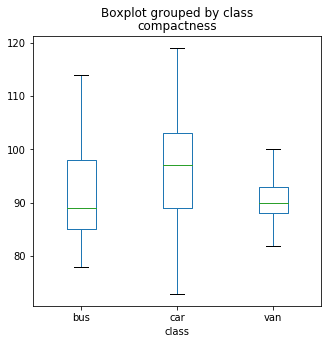

In [30]:
vehicle_data.boxplot(by ='class', column =['compactness'], grid = False, figsize=(5,5)) 

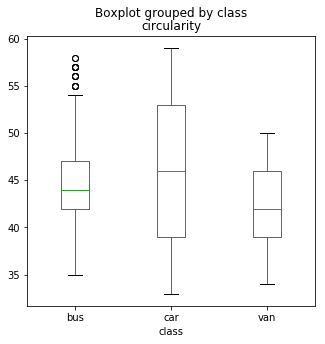

In [29]:
vehicle_data.boxplot(by ='class', column =['circularity'], grid = False, figsize=(5,5)) 

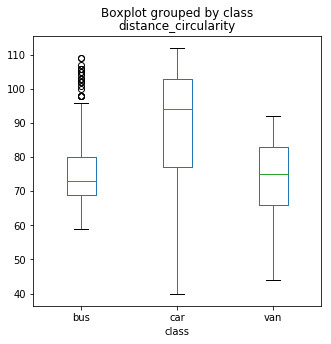

In [31]:
vehicle_data.boxplot(by ='class', column =['distance_circularity'], grid = False, figsize=(5,5)) 

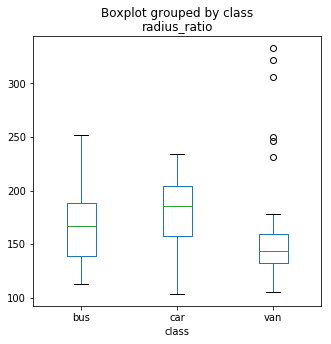

In [32]:
vehicle_data.boxplot(by ='class', column =['radius_ratio'], grid = False, figsize=(5,5)) 

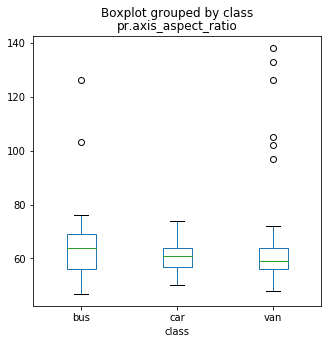

In [33]:
vehicle_data.boxplot(by ='class', column =['pr.axis_aspect_ratio'], grid = False, figsize=(5,5)) 

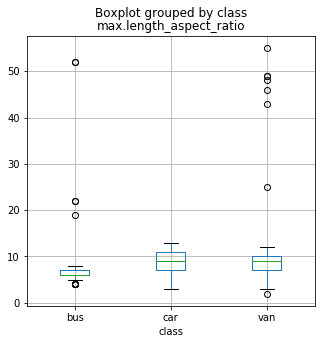

In [47]:
vehicle_data.boxplot(by ='class', column =['max.length_aspect_ratio'], figsize=(5,5)) 

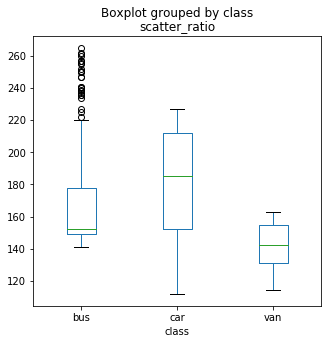

In [35]:
vehicle_data.boxplot(by ='class', column =['scatter_ratio'], grid = False, figsize=(5,5)) 

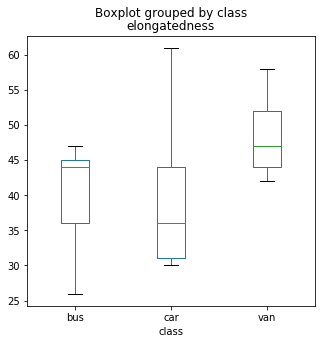

In [36]:
vehicle_data.boxplot(by ='class', column =['elongatedness'], grid = False, figsize=(5,5)) 

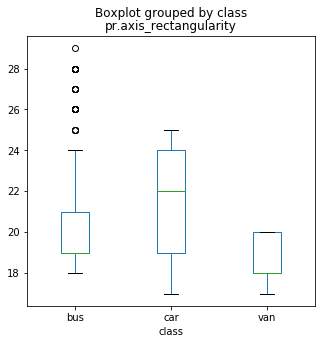

In [37]:
vehicle_data.boxplot(by ='class', column =['pr.axis_rectangularity'], grid = False, figsize=(5,5)) 

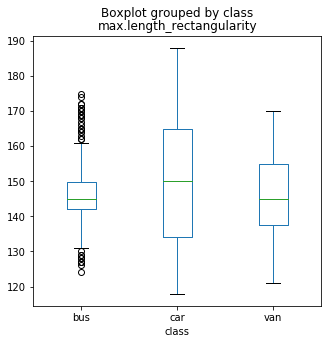

In [38]:
vehicle_data.boxplot(by ='class', column =['max.length_rectangularity'], grid = False, figsize=(5,5)) 

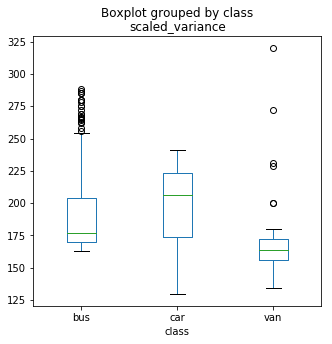

In [39]:
vehicle_data.boxplot(by ='class', column =['scaled_variance'], grid = False, figsize=(5,5)) 

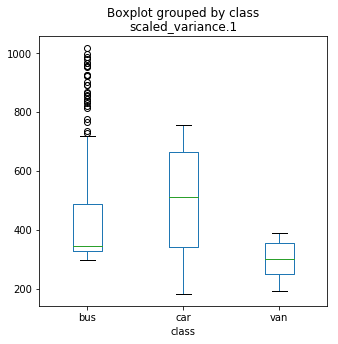

In [40]:
vehicle_data.boxplot(by ='class', column =['scaled_variance.1'], grid = False, figsize=(5,5)) 

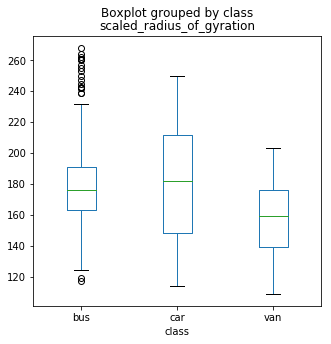

In [41]:
vehicle_data.boxplot(by ='class', column =['scaled_radius_of_gyration'], grid = False, figsize=(5,5)) 

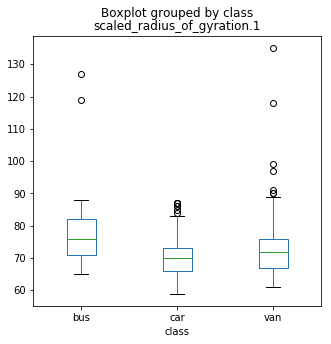

In [42]:
vehicle_data.boxplot(by ='class', column =['scaled_radius_of_gyration.1'], grid = False, figsize=(5,5)) 

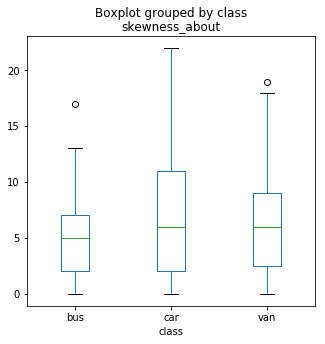

In [43]:
vehicle_data.boxplot(by ='class', column =['skewness_about'], grid = False, figsize=(5,5)) 

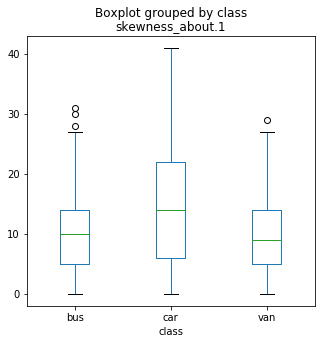

In [44]:
vehicle_data.boxplot(by ='class', column =['skewness_about.1'], grid = False, figsize=(5,5)) 

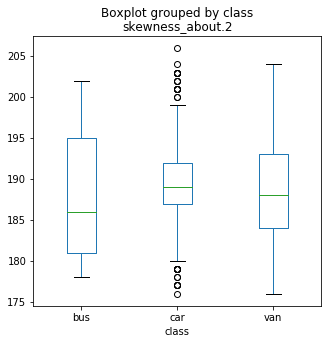

In [45]:
vehicle_data.boxplot(by ='class', column =['skewness_about.2'], grid = False, figsize=(5,5)) 

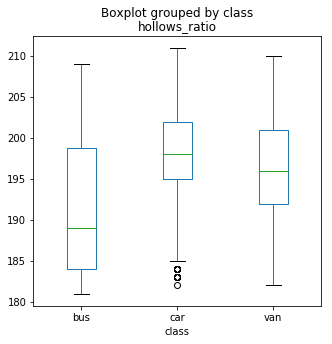

In [46]:
vehicle_data.boxplot(by ='class', column =['hollows_ratio'], grid = False, figsize=(5,5)) 

## Observation: 

The distribution of feature "max.length_aspect_ratio" can seperate the class "bus" from oher classes.

The following feature "scatter_ratio" data lower part distribution can seperate the class "van" from other two classes.

Also the feature "elongatedness" higher value distribution helps to seperate the following class "van" 

The feature "pr.axis_rectangularity" bus has some upper outliers.

The following feature "max.length_rectangularity" has upper and lower outliers in the class "bus".

The lower distribution value of "scaled_variance" seperates class "van" and it has few upper out liers and also class "bus" has huge upper outliers.

Scaled_variance.1 also seperate van, and it has huge upper outliers in the bus

Few lower and huge upper outliers in the scaled_radius_of_gyration

Scaled_radius_of_gyration.1,  three classes has few upper outliers

Few upper and lower outliers in the class car "skewness_about.2"

# Label Encoding for Class

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
vehicle_data['class'] = labelencoder.fit_transform(vehicle_data['class'])

In [49]:
# Store the mapping in dict variable.
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

{'bus': 0, 'car': 1, 'van': 2}


# Treating outliers

In [50]:
vehicle_Q1 = vehicle_data.quantile(q=.25, axis = 0)
vehicle_Q3 = vehicle_data.quantile(q=.75, axis = 0)
vehicle_IQR = vehicle_Q3 - vehicle_Q1
min_val = vehicle_Q1 - (1.5 * vehicle_IQR)
max_val = vehicle_Q3 + (1.5 * vehicle_IQR)

In [55]:
check1 = ((vehicle_data['radius_ratio'] >= min_val['radius_ratio']) & (vehicle_data['radius_ratio'] <= max_val['radius_ratio']))
check2 = ((vehicle_data['pr.axis_aspect_ratio'] >= min_val['pr.axis_aspect_ratio']) & (vehicle_data['pr.axis_aspect_ratio'] <= max_val['pr.axis_aspect_ratio']))
check3 = ((vehicle_data['max.length_aspect_ratio'] >= min_val['max.length_aspect_ratio']) & (vehicle_data['max.length_aspect_ratio'] <= max_val['max.length_aspect_ratio']))
check4 = ((vehicle_data['scaled_variance.1'] >= min_val['scaled_variance.1']) & (vehicle_data['scaled_variance.1'] <= max_val['scaled_variance.1']))
check5 = ((vehicle_data['scaled_variance'] >= min_val['scaled_variance']) & (vehicle_data['scaled_variance'] <= max_val['scaled_variance']))
check6 = ((vehicle_data['scaled_radius_of_gyration.1'] >= min_val['scaled_radius_of_gyration.1']) & (vehicle_data['scaled_radius_of_gyration.1'] <= max_val['scaled_radius_of_gyration.1']))
check7 = ((vehicle_data['skewness_about'] >= min_val['skewness_about']) & (vehicle_data['skewness_about'] <= max_val['skewness_about']))
check8 = ((vehicle_data['skewness_about.1'] >= min_val['skewness_about.1']) & (vehicle_data['skewness_about.1'] <= max_val['skewness_about.1']))
eda_data = vehicle_data[check1 & check2 & check3 & check4 & check5 & check6 & check7 & check8]

# After outliers treatment

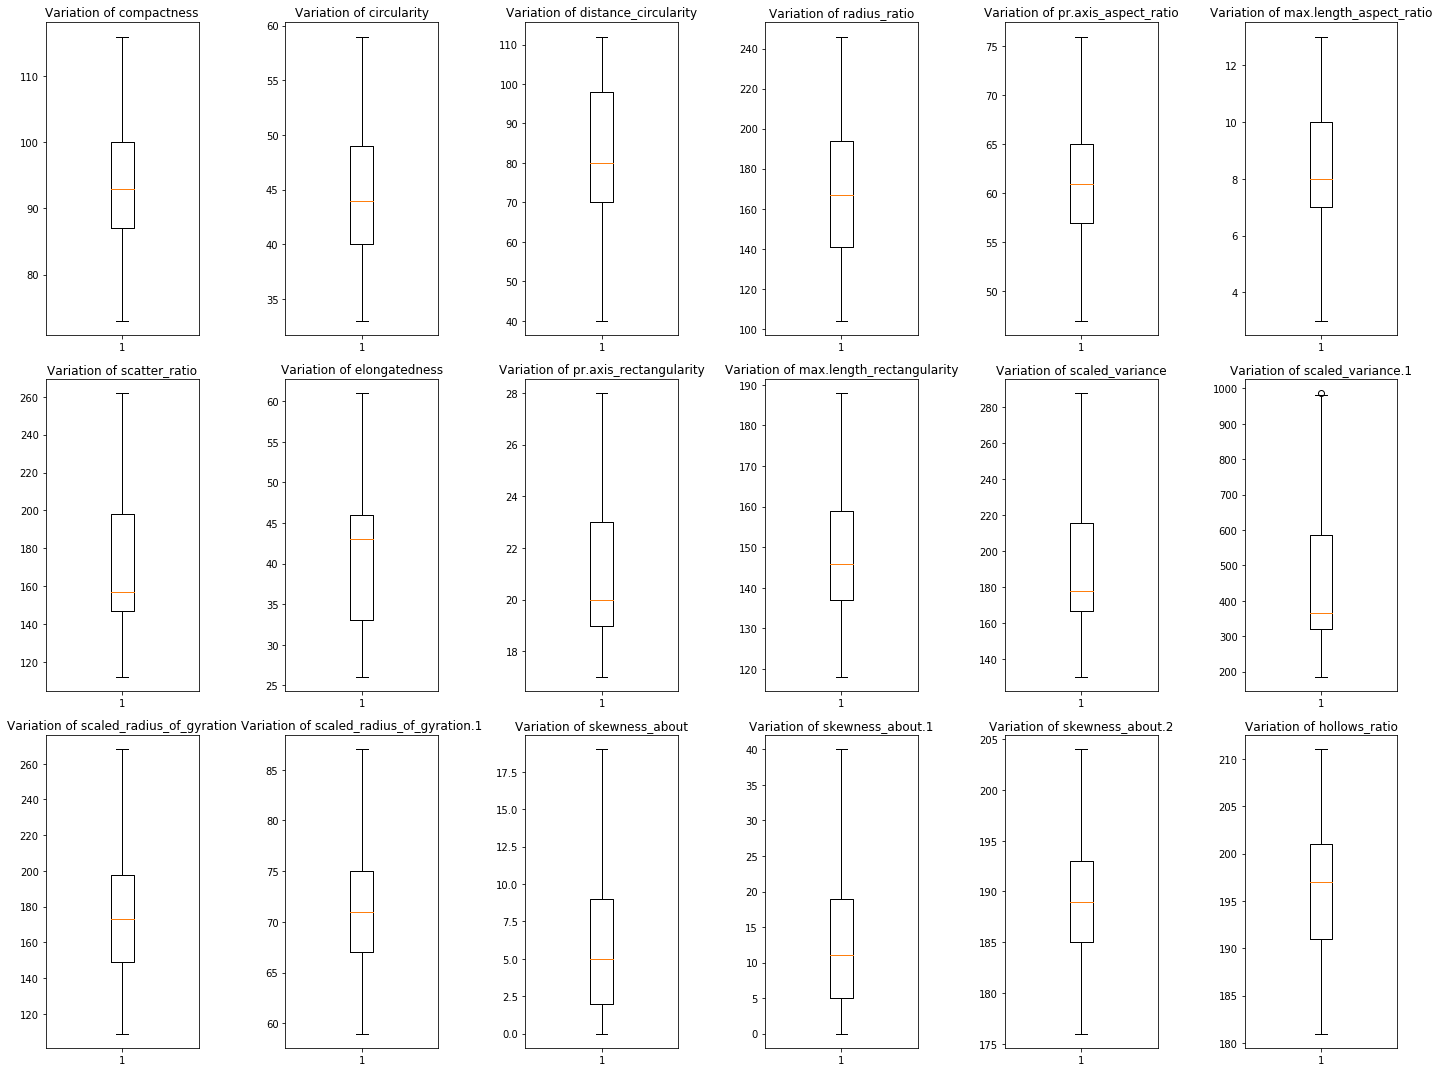

In [56]:
fig,axes=plt.subplots(3,6)
columns =['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',      'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',       'skewness_about.2', 'hollows_ratio', 'class']
colval = 0
for i in range (3):
    for j in range (6) :
        plot_fld = columns[colval]
        axes[i,j].boxplot(eda_data[plot_fld])
        axes[i,j].set_title('Variation of '+plot_fld)
        colval = colval+1
fig=plt.gcf()
fig.set_size_inches(20,15)
fig.tight_layout()

#### From the above box plot illustration, we can ensure that there is no outliers in the features.

# Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

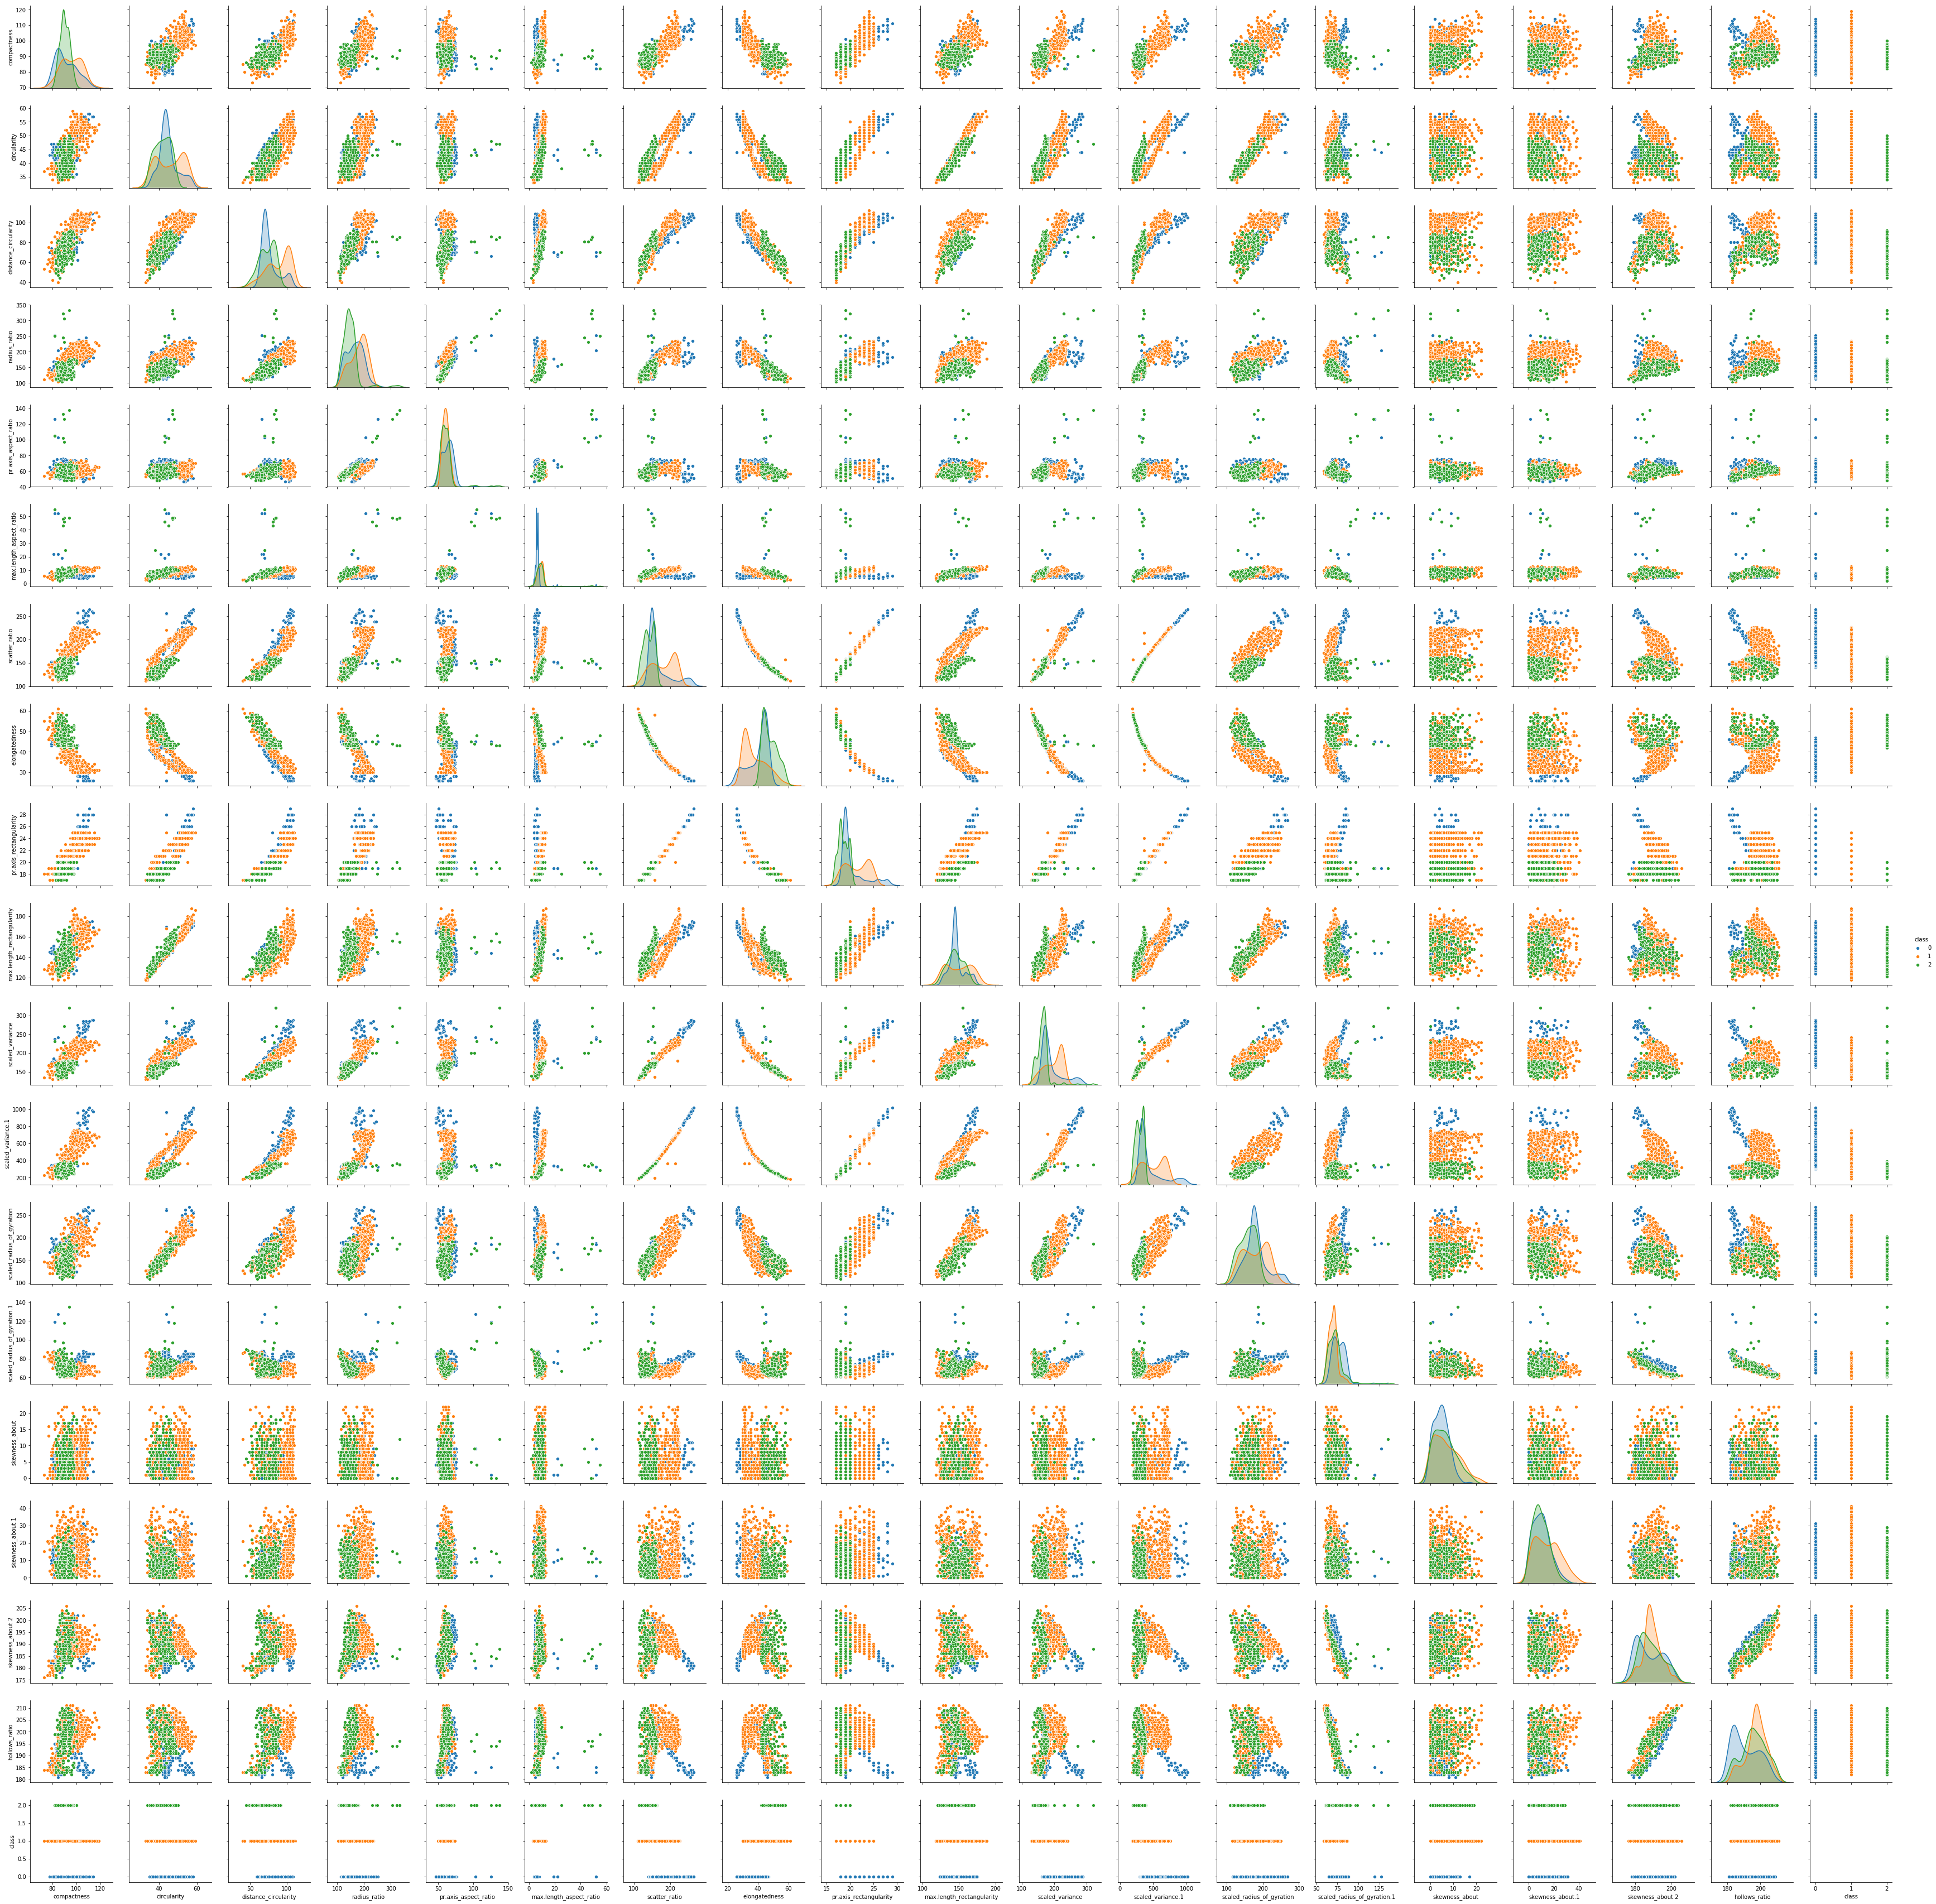

In [58]:
sns.pairplot(vehicle_data, diag_kind='kde', hue='class')

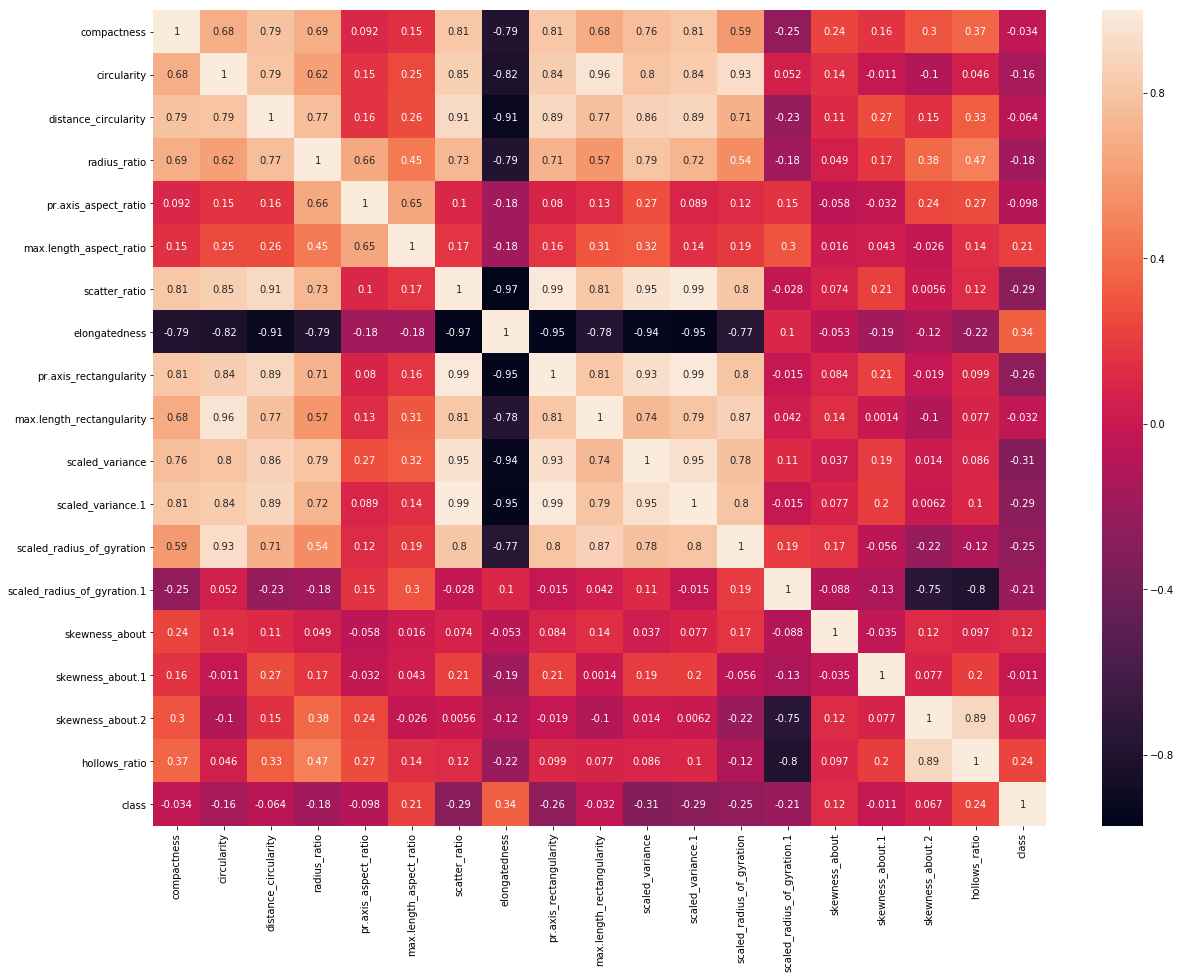

In [59]:
plt.subplots(figsize = (20,15))
sns.heatmap(vehicle_data.corr(), annot= True)

OBSERVATONS¶
Class do not have significant correlation with the below features...
'compactness', 'distance_circularity', 'pr.axis_aspect_ratio', 'max.length_rectangularity', 'skewness_about.1', 'skewness_about.2' So lets eliminate the above attributes (6) and consider only the rest (12) for analysis.

From the above heat map, we can say that compactness has good correlation with almost all the variables except with pr.axis_aspect_ratio and skewness_about.1. It also is negatively correlate with elongatedness

hollows_ratio is strongly correlated with skewness_ratio.2 and weaklly correlated with remaining attriutes

Elongateness has strong negative correlation with all the variables except with scale_radius_of_gyration.1.

radius ratio has comparetively weaker correation only with skewness_about.

Distance_circuarity also has good correlation with almost all the variables except with skewness_about and skewness_about.2

pr.axis_aspect_ratio has comparitively weaker correlation with all the attributes radius_ratio and max_length_aspect_ratio

scatter ratio is strongy correlated with almost all the attributes except with scaled_radius_of_gyration.1,skewness_about,skewness_about.2

skewness_about, skewness_about.1 has low correlation with almost all the attributes. skewness_about.2 has lower correlation with all the attributes except with scaled_radius_of_gyration.1 with which it has a strong negative correlation

# Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance)

In [61]:
X = vehicle_data.drop('class', axis = 1)
y = vehicle_data['class']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [64]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_sd)
Explained_Variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

In [66]:
print("Explianed Variance Ratio:\n", Explained_Variance)
print("\nSingular Values:\n", singular_values)

Explianed Variance Ratio:
 [5.23189736e-01 1.63480080e-01 1.10089283e-01 6.43966083e-02
 5.21437844e-02 2.83061865e-02 1.91247146e-02 1.23616237e-02
 8.58061480e-03 5.14373277e-03 3.93640787e-03 2.64324170e-03
 2.08418010e-03 1.54761525e-03 1.17044776e-03 9.57580667e-04
 6.27442105e-04 2.16719687e-04]

Singular Values:
 [74.66665809 41.73779742 34.25071389 26.19561525 23.5721057  17.36751921
 14.27560712 11.47717137  9.56216666  7.40348677  6.47660114  5.30720111
  4.71264502  4.06095901  3.53161313  3.19436685  2.58573453  1.51965949]


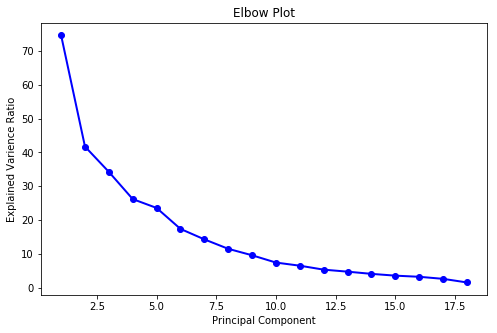

In [68]:
fig = plt.figure(figsize=(8,5))
plt.plot(range(1, Explained_Variance.size + 1), singular_values, 'bo-', linewidth=2)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Varience Ratio')
plt.show()

In [69]:
# Create a PCA that will retain 95% of the variance
pca = PCA(n_components=.95,)
pca.fit(X_train_sd)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
X_train_pca = pca.transform(X_train_sd)

In [71]:
print('Original number of features:', X_train_sd.shape[1])
print('Reduced number of features:', X_train_pca.shape[1])

Original number of features: 18
Reduced number of features: 7


In [74]:
X_test_pca = pca.transform(X_test_sd)

In [75]:
print('Original number of features:', X_test_sd.shape[1])
print('Reduced number of features:', X_test_pca.shape[1])

Original number of features: 18
Reduced number of features: 7


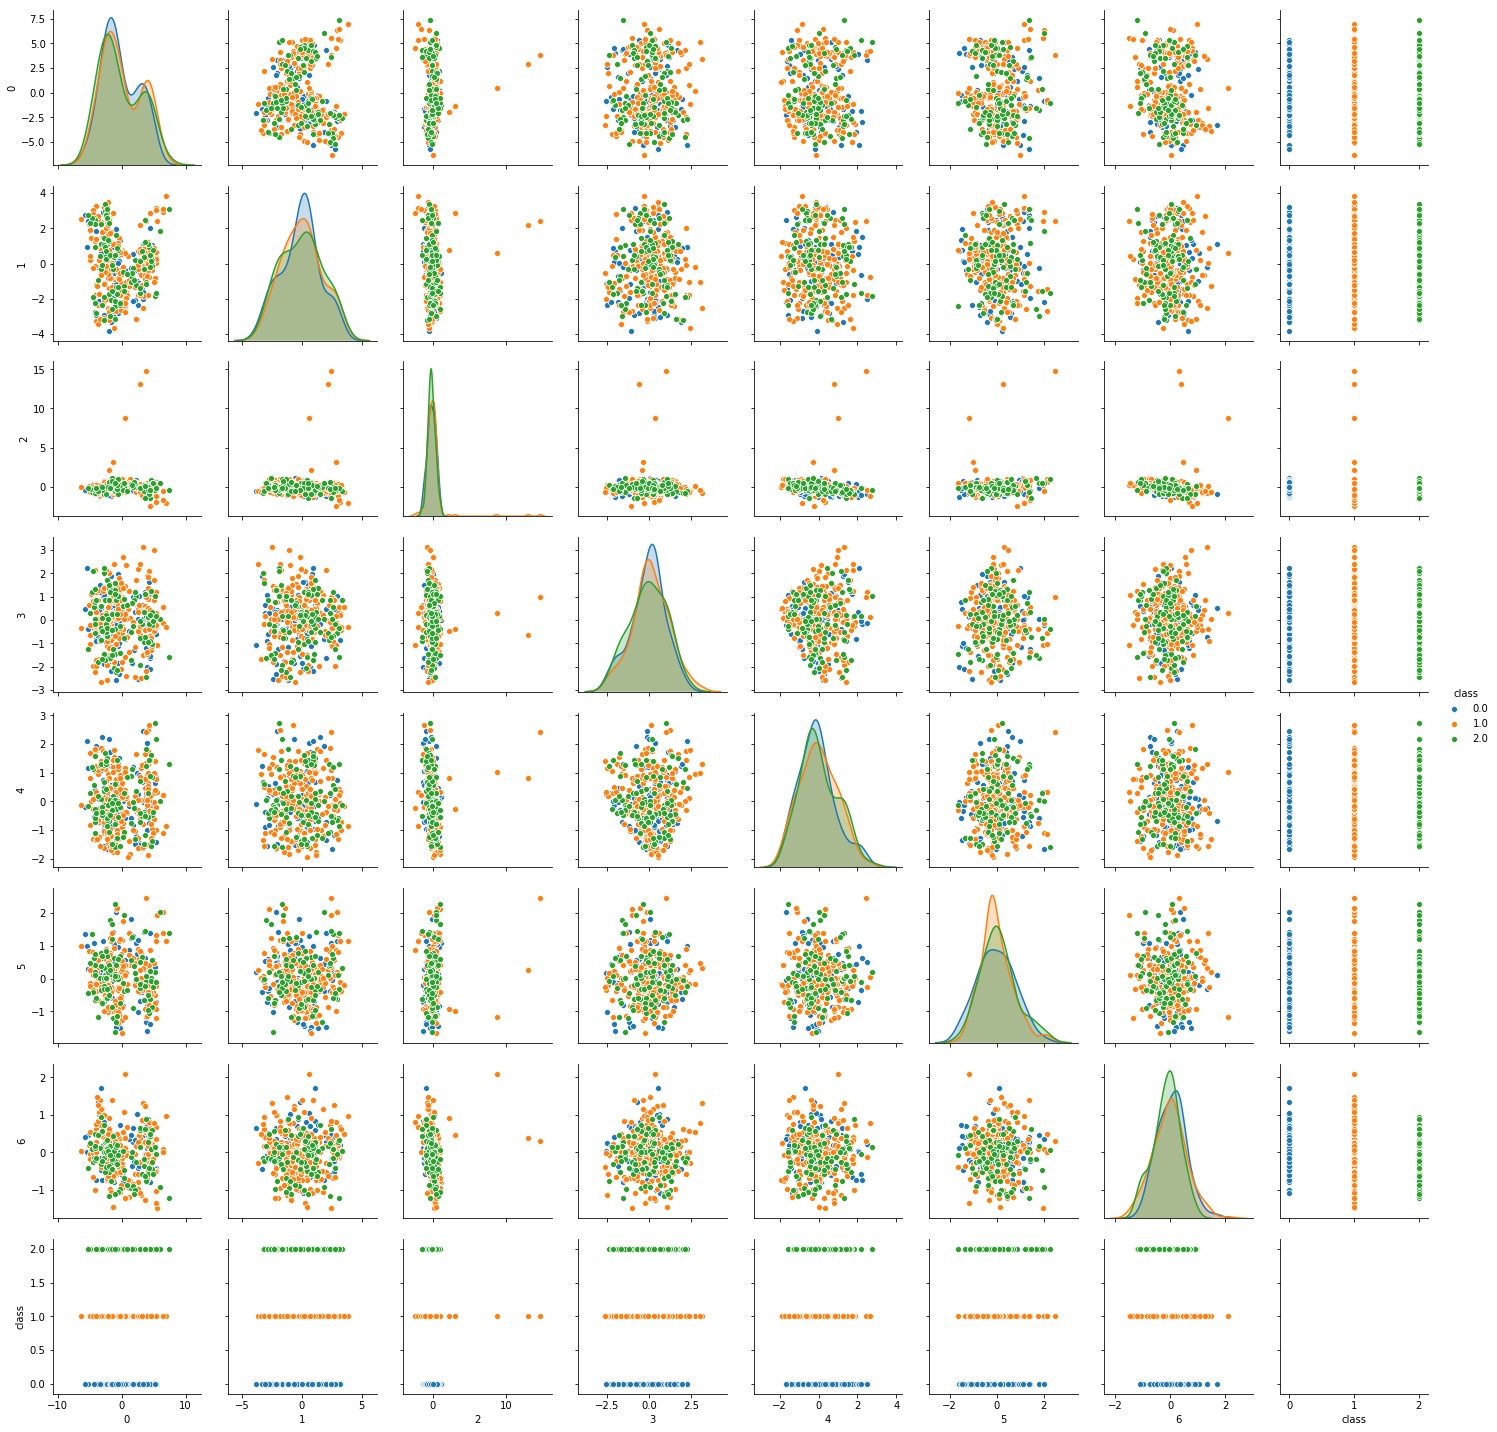

In [77]:
Proj_data_Train = pd.DataFrame(X_train_pca)  # converting array to dataframe for pairplot
Proj_data_Train = Proj_data_Train.join(y_train)
sns.pairplot(Proj_data_Train, diag_kind='kde', hue='class')

Observations:
All the correlations are eliminated between the independent variables.

There is no significant correlation between target (Class) and any of the PCA.

What was clearly visible as separate gaussians in original dimension is not visible any more. This is due to the fact that PCA dimesions are composite of the original dimensions

# Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy.

In [78]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_pca, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.92


In [93]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

In [88]:
y_pred = svc.predict(X_test_pca)

In [90]:
confusion_matrix(y_test, y_pred)

array([[ 67,   4,   0],
       [  1, 114,  10],
       [  0,   5,  53]], dtype=int64)

In [79]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}]

In [80]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [81]:
gs.fit(X_train_pca, y_train)

C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [82]:
gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Observation:
Through grid search we have got C=1 and kernel =rbf as the best fit.

Lets apply the hyper parameter to SVM and get the accuracy.

In [83]:
svc = SVC(C=1, kernel='rbf')
svc.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_pca, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.92


In [84]:
from sklearn.model_selection import cross_val_score

scoresTrain = cross_val_score(svc, X_train_pca, y_train, cv=10)
print("Train Accuracy Mean: %0.2f" % (scoresTrain.mean()))
print("\nTrain Scores:\n", scoresTrain)

Train Accuracy Mean: 0.91

Train Scores:
 [0.8852459  0.88333333 0.96666667 0.9        0.91525424 0.91525424
 0.93220339 0.89655172 0.82758621 0.96551724]


In [85]:
scoresTest = cross_val_score(svc, X_test_pca, y_test, cv=10)
print("Test Accuracy Mean: %0.2f" % (scoresTest.mean()))
print("\nTest Scores:\n", scoresTest)

Test Accuracy Mean: 0.85

Test Scores:
 [0.88888889 0.80769231 0.96153846 0.80769231 0.73076923 0.84
 0.84       0.84       0.91666667 0.83333333]


In [90]:
confusion_matrix(y_test, y_pred)

array([[ 67,   4,   0],
       [  1, 114,  10],
       [  0,   5,  53]], dtype=int64)

# Conclusion:
    
    After PCA approach, we can get reduced dimensions from 18 to 7 based on Elbow plot.
    
    We can clearly see that ther is no colinearity between selected 7 features those are derived from PCA approach.
    
    Based on PCA features, we can applied SVC model. It gives 96% accuracy for train data and 92% accuracy for test data.
    
    As per confusion matrix, we can clearly visible that there are 67 buses we can predict out of 71.
    
    And we can predict 114 cars out of 116. Also we can predict 53 Vans out of 58.
    
    The PCA approached resultes gives good accuracy and we can indetyfy the classes in good manner.
    
    The confusion matrix results reasonabbly good.
    
    Further grid search approch and data cross validation gives the accuracy of 91%  and 85% respectively.
    
    From this output we concluded that befor hyper tuning, we got good accuracy than after hyper tuning.
    
    So for this dataset and the way of approach, we concluded we can appy the before hypertuning results for practical approach.
    
    But it is not advise to don't do hyper tuning. Hypertuning also useful if the original accuray is not enough to proceed further.   